# Grama: Model Evaluation

*Purpose*: Once we've done the hard work of building a grama model, we can use a variety of tools to use the model. The primary way to use a grama model is to *evaluate* the mode to generate data, then use that data as a means to understand the model's behavior. We'll get to understanding soon, but first let's learn how to generate data using evaluation verbs.


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

To focus this exercise on using models, let's load up a model to play with:


In [2]:
from grama.models import make_plate_buckle
md_plate = make_plate_buckle()

# Evaluation

Recall that there are four classes of verb in grama; *evaluation* verbs take a model as an input and produce data as an output. Once we've generated that data, we can use visualization and other data tools to learn something about the model.



![Grama verb class diagram](./images/verb-classes.png)


We'll discuss three "subtypes" of evaluations:

- Manual input values - We specify the values for all of the inputs
- Mixed manual & automatic - We specify values for a *subset* of the inputs; the verb sets the remainder
- Automatic input values - The verb specifies all inputs values


# Manual Input Values

There are two core evaluations---`ev_df()` and `tf_md()`---that require us to specify all the input values. These are manual but fundamental tools for working with a model.

## DataFrame evaluation `ev_df()`

As the prefix implies, `ev_df()` takes a model as an input and returns data as an output. Since we need to specify all model input values, it is most convenient to pair `ev_df()` with the DataFrame constructor `df_make()`. Let's talk about some practical considerations when putting these tools together.


### __q1__ Set the input values

Use the `gr.ev_df()` verb with `gr.df_make()` to set input values for all the inputs of `md_plate`.

*Hint*: Note that there are a lot of variable values to set! Remember that "executing" a model on its own prints the model summary; use this to your advantage to get a reminder for what inputs you need, and what values might be reasonable.


In [3]:
# TASK: Complete the following code
(
    md_plate
    >> gr.ev_df(
        df=gr.df_make(
            m=1,
            t=0.06,
            h=12,
            w=12,
            L=1e-3,
            E=1e4,
            mu=0.33,
        )
    )
)

,m,t,h,w,L,E,mu,k_cr,g_buckle
0,1,0.06,12,12,0.001,10000.0,0.33,4.0,0.921591


## Evaluation as transformation `tf_md()`

Evaluations enter into a pipeline in a specific way: an evaluation takes a model and returns a DataFrame. In some cases, it is useful to be able to "add" the results of a model to a DataFrame as a transform. The `gr.tf_md()` helper serves this functionality.

Let's look at an example using the following dataset:


In [4]:
from grama.data import df_stang
df_stang.head(6)

,thick,alloy,E,mu,ang
0,0.022,al_24st,10600,0.321,0
1,0.022,al_24st,10600,0.323,0
2,0.032,al_24st,10400,0.329,0
3,0.032,al_24st,10300,0.319,0
4,0.064,al_24st,10500,0.323,0
5,0.064,al_24st,10700,0.328,0


### __q2__ Use a model as a transform

Use `gr.tf_md()` to add model results to the following dataframe using `md_plate`.


In [5]:
(
    df_stang
    >> gr.tf_mutate(
        m=1,
        L=0.001,
        t=0.06,
        h=12,
        w=12,
    )
    >> gr.tf_md(md_plate)
)

,thick,alloy,E,mu,ang,m,L,t,h,w,k_cr,g_buckle
0,0.022,al_24st,10600,0.321,0,1,0.001,0.06,12,12,4.0,0.970579
1,0.022,al_24st,10600,0.323,0,1,0.001,0.06,12,12,4.0,0.971976
2,0.032,al_24st,10400,0.329,0,1,0.001,0.06,12,12,4.0,0.957800
3,0.032,al_24st,10300,0.319,0,1,0.001,0.06,12,12,4.0,0.941724
4,0.064,al_24st,10500,0.323,0,1,0.001,0.06,12,12,4.0,0.962794
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.064,al_24st,10400,0.327,90,1,0.001,0.06,12,12,4.0,0.956391
72,0.064,al_24st,10500,0.320,90,1,0.001,0.06,12,12,4.0,0.960722
73,0.081,al_24st,9900,0.314,90,1,0.001,0.06,12,12,4.0,0.901916
74,0.081,al_24st,10000,0.316,90,1,0.001,0.06,12,12,4.0,0.912317


Full-manual evaluation is important, but other grama verbs provide useful ways to automatically select input values.


# Mixed Manual & Automatic

These verbs require that we set values for some of a model's inputs. This is most commonly split across the deterministic and random variables: We set specific values for the deterministic inputs, and the verb handles the random inputs.

## Nominal Evaluation

Sometimes it is useful to just get one set of "typical" values from a model. The `gr.ev_nominal()` verb provides this functionality.


### __q3__ Evaluate at nominal values

Use `gr.ev_nominal()` to evaluate `md_plate` at nominal input values.

*Hint*: Consult the documentation to see how you can make a "default" choice for the deterministic inputs.


In [6]:
(
    md_plate
    >> gr.ev_nominal(df_det="nom")
)

,E,mu,w,m,t,L,h,k_cr,g_buckle
0,10344.736842,0.321363,12.0,3.0,0.075,0.0016,12.0,11.111111,4.116312


## Sweeps

A key way to understand a model's behavior is to *sweep* through values of the inputs and study the effects on the outputs. We can do this manually by specifying a grid of points with `gr.df_grid()`, or automatically with `gr.ev_sinews()`.


### __q4__ Manual sweeps

Construct a manual sweep over values of `m` and `h`. Provide the values `m = [1, 2, 3]`, and sweep `h` between `6` and `12`.

*Hint 1*: Remember that in the previous exercise we learned how to use `gr.df_grid()` and `gr.linspace()`. To construct grids of points.


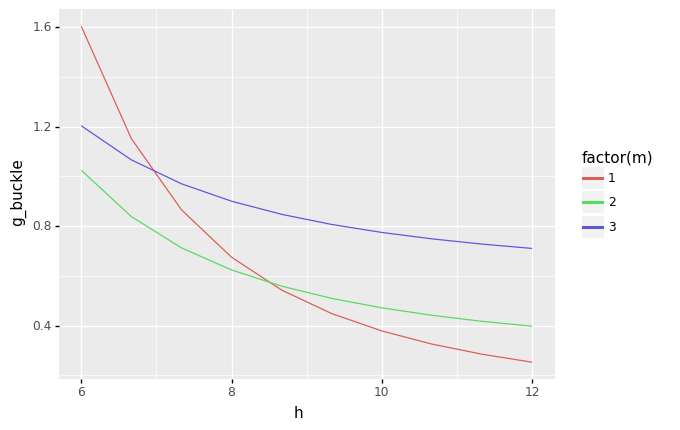

<ggplot: (8766400696561)>

In [7]:
(
    md_plate
    >> gr.ev_nominal(
        df_det=gr.df_grid(
            w=12,
            t=1/32,
            L=0.0016,
            m=[1, 2, 3],
            h=gr.linspace(6, 12, 10)
        )
    )
    
    >> gr.ggplot(gr.aes("h", "g_buckle"))
    + gr.geom_line(gr.aes(color="factor(m)"))
)

Note that you need to write a fair bit of code to produce a manual sweep. However, you also get complete control over which variables to sweep, and what ranges to consider.


### __q5__ Automatic sweeps

Use `gr.ev_sinews()` with `df_det="swp"` to sweep all the inputs in the model. Visualize the results.


Calling plot_sinew_outputs....


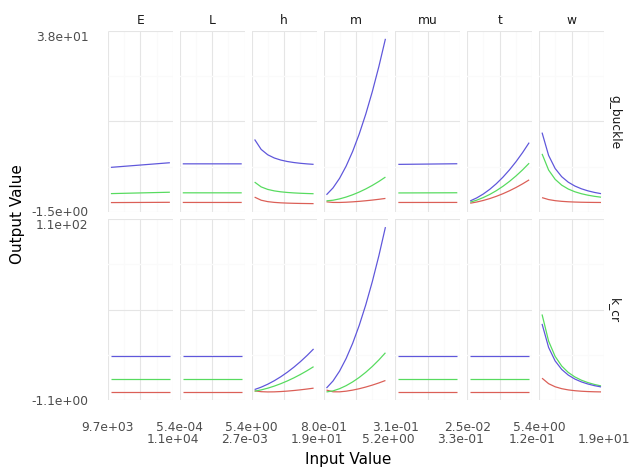

<ggplot: (8766400022477)>

In [8]:
(
    md_plate
    >> gr.ev_sinews(df_det="swp")
    >> gr.pt_auto()
)

Note how little code you need to write with `gr.ev_sinews()`; this is an excellent way to quickly inspect a model's behavior. However, we don't get as much control with this verb as with a manual sweep.

Automatic sweeps are useful for *exploring* a model, while manual sweeps are useful for getting more *specific* and especially for creating presentation-quality visuals to communicate results to others.


## Random Sampling

Deterministic and random inputs are fundamentally different; deterministic inputs must be specified, while random inputs are fundamentally unknown in value. The verb `gr.ev_sample()` draws a random sample according to the random inputs, while handling the deterministic inputs according to the user's choice.


### __q6__ Evaluate a simple random sample

Use `gr.ev_sample()` to draw a sample of size `100`. Use the nominal values for the deterministic inputs.


In [9]:
(
    md_plate
    >> gr.ev_sample(n=1e2, df_det="nom")
)

eval_sample() is rounding n...


,E,mu,w,m,t,L,h,k_cr,g_buckle
0,10445.410644,0.322644,12.0,3.0,0.075,0.0016,12.0,11.111111,4.160216
1,10535.972880,0.327419,12.0,3.0,0.075,0.0016,12.0,11.111111,4.210899
2,9963.545147,0.318756,12.0,3.0,0.075,0.0016,12.0,11.111111,3.957197
3,10444.887996,0.321367,12.0,3.0,0.075,0.0016,12.0,11.111111,4.156191
4,10645.085050,0.319009,12.0,3.0,0.075,0.0016,12.0,11.111111,4.228763
...,...,...,...,...,...,...,...,...,...
95,10219.180965,0.315176,12.0,3.0,0.075,0.0016,12.0,11.111111,4.048541
96,10564.800804,0.330628,12.0,3.0,0.075,0.0016,12.0,11.111111,4.232439
97,10400.542929,0.322074,12.0,3.0,0.075,0.0016,12.0,11.111111,4.140640
98,10960.709770,0.320350,12.0,3.0,0.075,0.0016,12.0,11.111111,4.358362


Like `gr.ev_sinews()`, the verb `gr.ev_nominal()` works with `gr.pt_auto()` to produce quick visuals of model behavior. Combined with the `skip` keyword, this allows us to study both the input and output behavior of the model.


### __q7__ Skip evaluation

Run the code below and inspect the output. Then add the keyword argument `skip=True` and re-run the code. Note the differences between the results. Answer the questions under *observations* below.


eval_sample() is rounding n...
Design runtime estimates unavailable; model has no timing data.
Calling plot_scattermat....


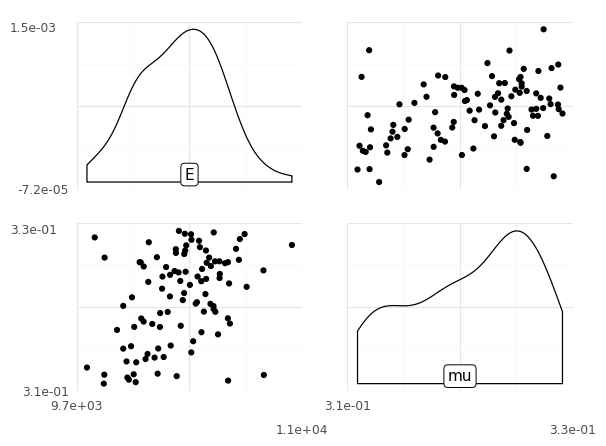

In [10]:
(
    md_plate
    >> gr.ev_sample(
        n=1e2, 
        df_det="nom",
        skip=True,
    )
    
    # NOTE: No need to edit
    >> gr.pt_auto()
)

*Observations*

- What values does `g_buckle` tend to take?
  - `g_buckle` tends to take values between 3.8 and 4.4
- How are the values for inputs `E` and `mu` related?
  - `E` and `mu` are positively correlated


## Sweep Plus Sampling

Using `gr.ev_sample()` we can perform sweeps over deterministic inputs while sampling the random inputs. This follows similar code patterns to what we did with `gr.ev_nominal()`.


### __q8__ Sweeps with sampling

Edit the code below to sweep over deterministic inputs, but sample the random inputs. Answer the questions under *observations* below.


eval_sample() is rounding n...


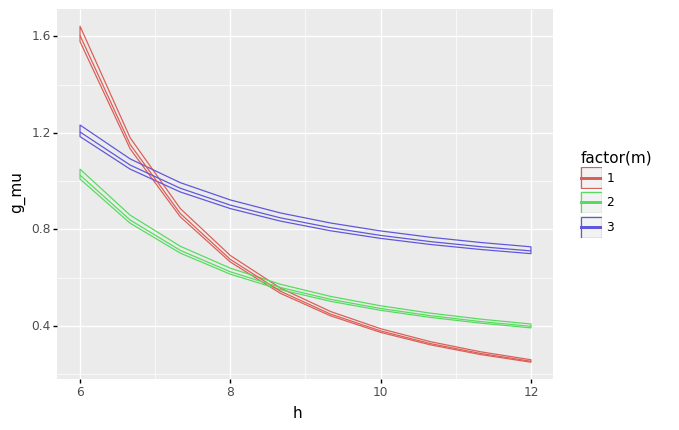

<ggplot: (8766369982212)>

In [11]:
(
    md_plate

    >> gr.ev_sample(
        n=1e2,
        df_det=gr.df_grid(
            w=12,
            t=1/32,
            L=0.0016,
            m=[1, 2, 3],
            h=gr.linspace(6, 12, 10)
        )
    )
    
    ## NOTE: No need to edit below; use to inspect results
    # Compute low, middle, high values at each m, h
    >> gr.tf_group_by(DF.m, DF.h)
    >> gr.tf_summarize(
        g_lo=gr.quant(DF.g_buckle, p=0.25),
        g_mu=gr.median(DF.g_buckle),
        g_hi=gr.quant(DF.g_buckle, p=0.75),
    )
    # Visualize
    >> gr.ggplot(gr.aes("h", "g_mu", color="factor(m)"))
    + gr.geom_ribbon(gr.aes(ymin="g_lo", ymax="g_hi"), fill=None)
    + gr.geom_line()
)

*Observations*

- How does the variability due to the random inputs (shown by width of bands) compare with variability due to the deterministic inputs (the curves).
  - The variability due to random inputs is much smaller than the variability due to deterministic inputs, but it is nonzero.


# Automatic Input Values

Other grama verbs do not require us to specify any input values. Here are a few examples.

## Contour Evaluation

In cases where we have just two inputs, we can construct contour plots of the output quantities. The verb `gr.ev_contour()` generates the data necessary for a contour plot.


### __q9__ Visualize function contours

Complete the arguments for `gr.ev_contour()` to generate contour data for the following model. Make sure to generate contours for both outputs `f` and `g`.


Calling plot_contour....


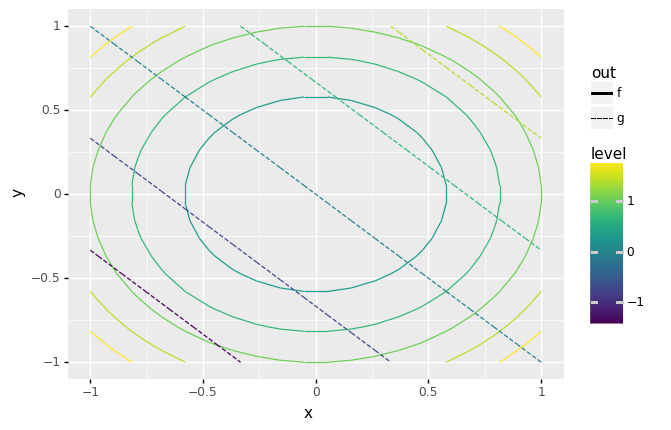

<ggplot: (8766369610897)>

In [12]:
# TASK: Complete the contour evaluation arguments
(
    # NOTE: No need to edit this model
    gr.Model("Contour Demo")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=df.x**2 + df.y**2,
            g=df.x + df.y,
        ),
        var=["x", "y"],
        out=["f", "g"],
    )
    >> gr.cp_bounds(
        x=(-1, +1),
        y=(-1, +1),
    )
    
    # TASK: Complete the arguments for ev_contour()
    >> gr.ev_contour(

        var=["x", "y"],
        out=["f", "g"],
    )
    
    # NOTE: No need to edit; use to visualize
    >> gr.pt_auto()
)

*Note*: Contours are fundamentally two-input constructions. If your model has more than two inputs, you will need to specify manual values for the other inputs.


### __q10__ Find specific contour levels

Use `gr.ev_contour()` to find the contour of `g` that is tangent to the contour where `f == 1`. 

You'll need to use the `levels` argument of `gr.ev_contour()` to do this, and it will take a bit of trial-and-error.


Calling plot_contour....


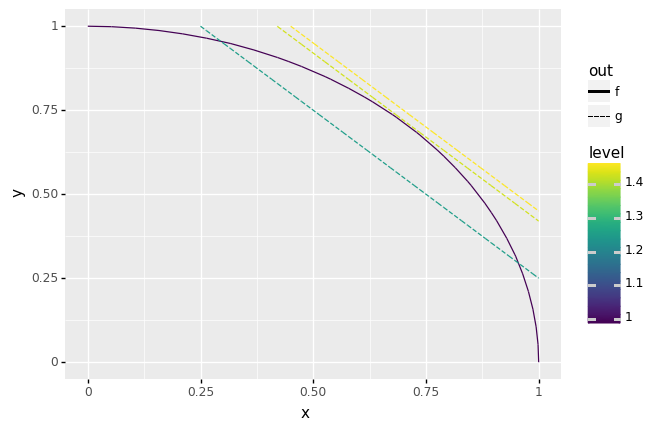

<ggplot: (8766400432162)>

In [13]:
# TASK: Find the tangent contour of `g`
df_contour = (
    # NOTE: No need to edit this model
    gr.Model("Contour Demo")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=df.x**2 + df.y**2,
            g=df.x + df.y,
        ),
        var=["x", "y"],
        out=["f", "g"],
    )
    >> gr.cp_bounds(
        x=(0, +1),
        y=(0, +1),
    )
    
    # TASK: Use specific levels to find the tangent
    >> gr.ev_contour(
        var=["x", "y"],
        out=["f", "g"],

        levels=dict(
            f=[1],
            g=[1.25, 1.42, 1.45], # g == 1.42 is approximately correct
        )
    )
)

# NOTE: No need to edit; use to visualize
gr.plot_auto(df_contour)

## Constrained Minimization

As one last example of verbs that select automatic input values: Grama provides tools for constrained minimization, which determines the input values necessary to minimize an output quantity. The following code demonstrates how this works:


In [14]:
# NOTE: No need to edit
df_opt = (
    # Set up a model
    gr.Model("Contour Demo")
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(
            f=df.x**2 + df.y**2,
            g=df.x + df.y - 1.42,
        ),
        var=["x", "y"],
        out=["f", "g"],
    )
    >> gr.cp_bounds(
        x=(0, +1),
        y=(0, +1),
    )
    
    # Minimize the objective with a constraint
    >> gr.ev_min(
        out_min="f",   # Output to minimize
        out_geq=["g"], # Output constraint, g >= 0
    )
)

df_opt

,y,x,y_0,x_0,f,g,success,message,n_iter
0,0.71,0.71,0.5,0.5,1.0082,1.776357e-15,True,Optimization terminated successfully,3


As a brief aside, this minimization is related to the "tangent" problem above.


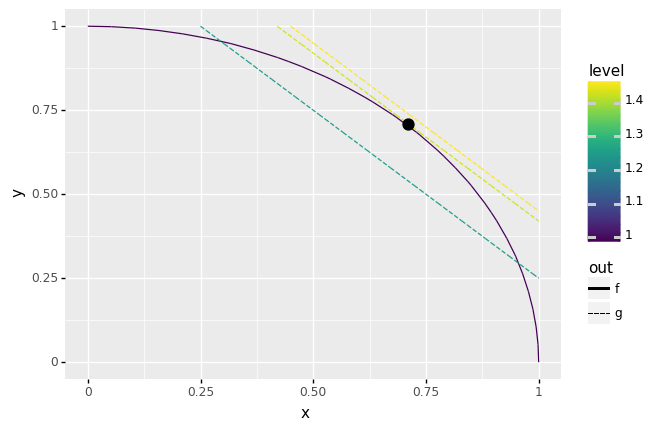

<ggplot: (8766370353896)>

In [15]:
# NOTE: No need to edit; this visualizes the optimization results
# in the context of the contour data
(
    df_contour
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_segment(
        gr.aes(
            xend="x_end", 
            yend="y_end",
            color="level",
            linetype="out",
          )
    )
    + gr.geom_point(data=df_opt, size=4)
)

# List of evaluation routines

For your reference, here are a few of the evaluation verbs, sorted by how they handle input values and with a brief description.

| Verb | Input values | Description |
|------|-------|-------------|
| `ev_df()` | Manual | DataFrame evaluation |
| `tf_md()` | Manual | Model as transformation |
| `ev_nominal()` | Mixed | Nominal values for random inputs |
| `ev_sample()` | Mixed | Random values for random inputs |
| `ev_conservative()` | Mixed | Conservative values for random inputs |
| `ev_contour()` | Auto | Generate contour plot data |
| `ev_sinews()` | Auto | Generate sinew plot data |
| `ev_min()` | Auto | Constrained minimization |
